# Web Scraping

In [ ]:
#Brian Zhao, Adriana Cruz, Terril Gibson, James Madsen, Peter Delgado

In [ ]:
#Install library if necessary
!pip install selenium beautifulsoup4 pandas webdriver-manager

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.3/486.3 kB 12.0 MB/s eta 0:00:00


In [3]:
#import libraries
import time
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from bs4 import BeautifulSoup

ModuleNotFoundError: No module named 'selenium'

In [ ]:
#set up selenium WebDriver to control the browser
options = webdriver.ChromeOptions()
options.add_argument("--headless")
options.add_argument("--disable-gpu")
options.add_argument("--no-sandbox")

#Initialize WebDriver
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service = service, options = options)

WebDriverException: Message: unknown error: cannot find Chrome binary
Stacktrace:
#0 0x5cfdc76994e3 <unknown>
#1 0x5cfdc73c8c76 <unknown>
#2 0x5cfdc73ef757 <unknown>
#3 0x5cfdc73ee029 <unknown>
#4 0x5cfdc742cccc <unknown>
#5 0x5cfdc742c47f <unknown>
#6 0x5cfdc7423de3 <unknown>
#7 0x5cfdc73f92dd <unknown>
#8 0x5cfdc73fa34e <unknown>
#9 0x5cfdc76593e4 <unknown>
#10 0x5cfdc765d3d7 <unknown>
#11 0x5cfdc7667b20 <unknown>
#12 0x5cfdc765e023 <unknown>
#13 0x5cfdc762c1aa <unknown>
#14 0x5cfdc76826b8 <unknown>
#15 0x5cfdc7682847 <unknown>
#16 0x5cfdc7692243 <unknown>
#17 0x78c4db04aac3 <unknown>


In [ ]:
#open Edmunds forum
FORUM_URL = "https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans"

#use the last page number to get newest posts.
data = []
page_count = 435

#condition it to stop after collecting the 5,000
while len(data) < 5000:
    print(f"Scraping Page {page_count}.")

    driver.get(f"https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans/p{page_count}")
    time.sleep(3)

    posts = driver.find_elements(By.CLASS_NAME, "Comment")

    for post in posts:
        try:
            username = post.find_element(By.CLASS_NAME, "Author").text
            date = post.find_element(By.TAG_NAME, "time").text
            comment = post.find_element(By.CLASS_NAME, "Message").text
            data.append([username,date,comment])

            if len(data) >= 5000:
                break
        except:
            continue

    page_count -= 1

    if page_count < 1:
        print("Reached the first page, stopping now")
        break


#close selenium
driver.quit()

#save the data & print it
df= pd.DataFrame(data, columns=["Username", "Date", "Comment"])
df.to_csv("edmunds_forum_data.csv", index = False)

print(f"Scaping is complete, we have collected {len(data)} posts & data has been saved in CSV form!")


Scraping Page 435.
Scraping Page 434.
Scraping Page 433.
Scraping Page 432.
Scraping Page 431.
Scraping Page 430.
Scraping Page 429.
Scraping Page 428.
Scraping Page 427.
Scraping Page 426.
Scraping Page 425.
Scraping Page 424.
Scraping Page 423.
Scraping Page 422.
Scraping Page 421.
Scraping Page 420.
Scraping Page 419.
Scraping Page 418.
Scraping Page 417.
Scraping Page 416.
Scraping Page 415.
Scraping Page 414.
Scraping Page 413.
Scraping Page 412.
Scraping Page 411.
Scraping Page 410.
Scraping Page 409.
Scraping Page 408.
Scraping Page 407.
Scraping Page 406.
Scraping Page 405.
Scraping Page 404.
Scraping Page 403.
Scraping Page 402.
Scraping Page 401.
Scraping Page 400.
Scraping Page 399.
Scraping Page 398.
Scraping Page 397.
Scraping Page 396.
Scraping Page 395.
Scraping Page 394.
Scraping Page 393.
Scraping Page 392.
Scraping Page 391.
Scraping Page 390.
Scraping Page 389.
Scraping Page 388.
Scraping Page 387.
Scraping Page 386.
Scraping Page 385.
Scraping Page 384.
Scraping Pag

In [8]:
df = pd.read_csv('edmunds_forum_data.csv')
df.head(10)

,Username,Date,Comment
0,Michaell,February 2020,benjaminh said:\nshow previous quotes\n\n\n\n\...
1,andres3,February 2020,Add $350 to any lease on a Kia if you are not ...
2,andres3,February 2020,benjaminh said:\nshow previous quotes\nAm I re...
3,tjc78,February 2020,That's a jaw-dropping lease incentive. Amazing...
4,Michaell,February 2020,"andres3 said:\nAlso, by the way, the $400 disp..."
5,dino001,February 2020,andres3 said:\n\nDid you hear about the Key FO...
6,dino001,February 2020,Michaell said:\nshow previous quotes\n\n\n\n\n...
7,stickguy,February 2020,But in month 2 you buy it out for residual plu...
8,benjaminh,February 2020,I think the big Stinger incentives are for 201...
9,dino001,February 2020,stickguy said:\nBut in month 2 you buy it out ...


# Cleaning The Comment Section to Generate Word Frequency & Lift

In [9]:
#import all necessary libraries
import pandas as pd
import numpy as np
import nltk
from collections import Counter
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [10]:
# Load stopwords
stop_words = set(stopwords.words('english'))

# Load the model-to-brand mapping (assuming it's a CSV or dictionary)
model_to_brand = pd.read_csv('car_models_and_brands (3).csv')  # Replace with your actual file
# Convert both 'Model' and 'Brand' columns to lowercase
model_to_brand['Model'] = model_to_brand['Model'].str.lower()
model_to_brand['Brand'] = model_to_brand['Brand'].str.lower()

model_to_brand_dict = dict(zip(model_to_brand['Model'], model_to_brand['Brand']))

# Function to clean and preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = str(text)
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Replace car models with brands
    words = text.split()
    cleaned_words = []
    cleaned_brands = []

    for word in words:
        # get all words appended to cleaned_words, use later for association mining
        cleaned_words.append(model_to_brand_dict.get(word, word))

        # get car brands counted as well as make/models converted to brand names
        if (word in model_to_brand_dict):
            cleaned_brands.append(model_to_brand_dict[word])

        elif word in model_to_brand_dict.values():
        # If the word is a brand name (value), you can append it directly
            cleaned_brands.append(word)

    # Remove stopwords
    cleaned_words = [word for word in cleaned_words if word not in stop_words]
    return cleaned_words, cleaned_brands

# Apply preprocessing to all posts
df[['cleaned_posts','cleaned_brands']] = pd.DataFrame(df['Comment'].apply(preprocess_text).tolist(), index=df.index)

# Flatten the list of words and count frequencies
all_words = [word for sublist in df['cleaned_posts'] for word in sublist]
brand_words = [word for sublist in df['cleaned_brands'] for word in sublist]
word_counts = Counter(all_words)
brand_counts = Counter(brand_words)

In [11]:
df.head(5)

,Username,Date,Comment,cleaned_posts,cleaned_brands
0,Michaell,February 2020,benjaminh said:\nshow previous quotes\n\n\n\n\...,"[benjaminh, said, show, previous, quotes, that...","[lexus, lexus]"
1,andres3,February 2020,Add $350 to any lease on a Kia if you are not ...,"[add, 350, lease, kia, buying, due, key, fob, ...","[kia, kia, lexus, kia, kia]"
2,andres3,February 2020,benjaminh said:\nshow previous quotes\nAm I re...,"[benjaminh, said, show, previous, quotes, reme...","[kia, kia, lexus, genesis, genesis, kia, kia, ..."
3,tjc78,February 2020,That's a jaw-dropping lease incentive. Amazing...,"[thats, jawdropping, lease, incentive, amazing...",[]
4,Michaell,February 2020,"andres3 said:\nAlso, by the way, the $400 disp...","[andres3, said, also, way, 400, disposition, f...","[kia, lexus, kia, kia]"


### Task A: Top Ten Brands Extracted

In [12]:
# Get the top 10 brands based on frequency
top_10_brands = [brand for brand, count in brand_counts.most_common(10)]
top_50_words = [brand for brand, count in word_counts.most_common(50)]
print("Top 10 Brands:", top_10_brands)

Top 10 Brands: ['lexus', 'audi', 'bmw', 'acura', 'honda', 'cadillac', 'infiniti', 'kia', 'ford', 'volvo']


In [13]:
#proof that these are the top brands found in the comment section
brand_counts

Counter({'lexus': 8341,
         'kia': 386,
         'genesis': 259,
         'bmw': 2372,
         'acura': 1192,
         'ram': 97,
         'audi': 2388,
         'buick': 164,
         'cadillac': 488,
         'honda': 749,
         'infiniti': 398,
         'volvo': 274,
         'volkswagen': 216,
         'hyundai': 170,
         'tata motors': 18,
         'alfa romeo': 33,
         'tesla': 108,
         'opel/vauxhall': 22,
         'toyota': 215,
         'porsche': 242,
         'dodge': 122,
         'fiat': 102,
         'chrysler': 153,
         'ford': 366,
         'suzuki': 56,
         'subaru': 201,
         'chevrolet': 206,
         'seat': 209,
         'peugeot': 35,
         'mini': 66,
         'mazda': 170,
         'alpina': 19,
         'nissan': 76,
         'jaguar': 119,
         'smart': 41,
         'saab': 7,
         'lotus': 4,
         'skoda': 18,
         'polestar': 5,
         'ferrari': 9,
         'maserati': 10,
         'renault': 3,
   

### Task B: Creating The Lift Ratios

In [14]:
# Create binary columns for each brand in the top 10
#### This hotcode so that multiple mentions  are not counted twice
for brand in top_10_brands:
    df[brand] = df['cleaned_posts'].apply(lambda x: 1 if brand in x else 0)

# Calculate the probability of each brand
brand_prob = {brand: df[brand].sum() / len(df) for brand in top_10_brands}

# Calculate the joint probabilities (P(A ∩ B))
joint_probabilities = {}
for i, brand_a in enumerate(top_10_brands):
    for brand_b in top_10_brands[i+1:]:
        joint_prob = (df[brand_a] & df[brand_b]).sum() / len(df)
        joint_probabilities[(brand_a, brand_b)] = joint_prob

# Calculate lift ratios
lift_ratios = {}
for (brand_a, brand_b), joint_prob in joint_probabilities.items():
    lift = joint_prob / (brand_prob[brand_a] * brand_prob[brand_b])
    lift_ratios[(brand_a, brand_b)] = lift

# Display the lift ratios
for (brand_a, brand_b), lift in lift_ratios.items():
    print(f"Lift({brand_a}, {brand_b}): {lift}")

Lift(lexus, audi): 1.376173795295988
Lift(lexus, bmw): 1.2340285027232007
Lift(lexus, acura): 1.3145130511945233
Lift(lexus, honda): 1.3760453301411333
Lift(lexus, cadillac): 1.3514719234988164
Lift(lexus, infiniti): 1.3271680925709362
Lift(lexus, kia): 1.3399909726923946
Lift(lexus, ford): 1.3181466857598219
Lift(lexus, volvo): 1.3128656493585404
Lift(audi, bmw): 1.816056257585493
Lift(audi, acura): 2.1435617269899083
Lift(audi, honda): 1.5721565651089668
Lift(audi, cadillac): 2.7384563532187394
Lift(audi, infiniti): 2.7585638998682476
Lift(audi, kia): 1.383856682769726
Lift(audi, ford): 1.250480954213159
Lift(audi, volvo): 2.578037904124861
Lift(bmw, acura): 1.3397066114163063
Lift(bmw, honda): 1.0953732253930035
Lift(bmw, cadillac): 1.7502323035602905
Lift(bmw, infiniti): 1.9592476489028214
Lift(bmw, kia): 1.501398771513714
Lift(bmw, ford): 1.398636964703489
Lift(bmw, volvo): 1.710454296661193
Lift(acura, honda): 3.677542618149217
Lift(acura, cadillac): 2.6042723595384016
Lift(acura

In [15]:
# Initialize the matrix as a dictionary of dictionaries
lift_matrix_dict = {brand: {other_brand: 0 for other_brand in top_10_brands} for brand in top_10_brands}

# Populate the matrix with lift ratios from lift_ratios dictionary
for (brand1, brand2), lift_ratio in lift_ratios.items():
    if brand1 in top_10_brands and brand2 in top_10_brands:
        lift_matrix_dict[brand1][brand2] = lift_ratio

# Convert the dictionary into a DataFrame for better structure and export
lift_matrix_df = pd.DataFrame(lift_matrix_dict)

# Ensure the matrix is symmetric by copying values from the lower triangle to the upper triangle
for i in range(len(lift_matrix_df.columns)):
    for j in range(i + 1, len(lift_matrix_df.columns)):
        lift_matrix_df.iloc[i, j] = lift_matrix_df.iloc[j, i]

# Export the DataFrame to CSV
lift_matrix_df.to_csv('lift_matrix.csv', index=True)

# visualize Lift Matrix
lift_matrix_df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
     {'selector': 'tbody td', 'props': [('background-color', 'lightyellow'), ('color', 'black')]}]
)

<ipython-input-15-97ccd4790456>:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1.3128656493585404' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  lift_matrix_df.iloc[i, j] = lift_matrix_df.iloc[j, i]


,lexus,audi,bmw,acura,honda,cadillac,infiniti,kia,ford,volvo
lexus,0.000000,1.376174,1.234029,1.314513,1.376045,1.351472,1.327168,1.339991,1.318147,1.312866
audi,1.376174,0.000000,1.816056,2.143562,1.572157,2.738456,2.758564,1.383857,1.250481,2.578038
bmw,1.234029,1.816056,0.000000,1.339707,1.095373,1.750232,1.959248,1.501399,1.398637,1.710454
acura,1.314513,2.143562,1.339707,0.000000,3.677543,2.604272,4.164683,1.292741,0.965266,3.132412
honda,1.376045,1.572157,1.095373,3.677543,0.000000,1.401535,2.078138,2.193590,1.931013,0.799284
cadillac,1.351472,2.738456,1.750232,2.604272,1.401535,0.000000,3.890651,1.704709,1.800782,4.472272
infiniti,1.327168,2.758564,1.959248,4.164683,2.078138,3.890651,0.000000,2.630471,1.424645,5.099068
kia,1.339991,1.383857,1.501399,1.292741,2.193590,1.704709,2.630471,0.000000,1.229105,1.929012
ford,1.318147,1.250481,1.398637,0.965266,1.931013,1.800782,1.424645,1.229105,0.000000,1.418198
volvo,1.312866,2.578038,1.710454,3.132412,0.799284,4.472272,5.099068,1.929012,1.418198,0.000000


### Task C: MDS Plot

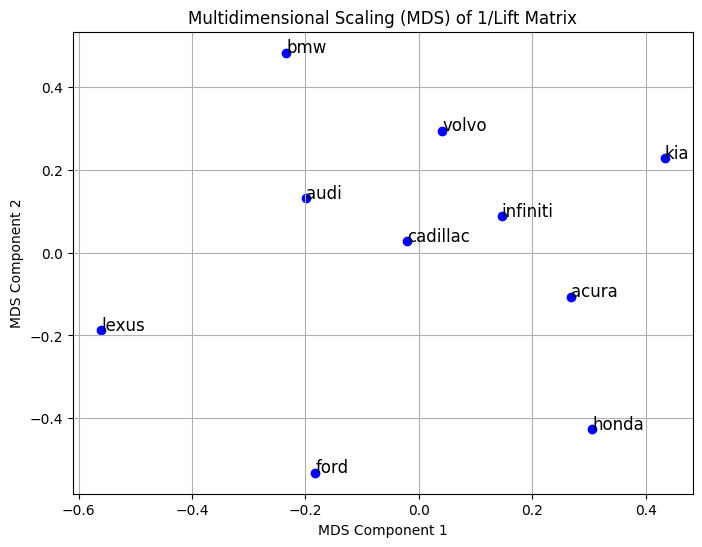

In [16]:
# Load the lift matrix CSV (ensure it's already exported)
lift_matrix_df = pd.read_csv('lift_matrix.csv', index_col=0)

# Convert the lift ratios into dissimilarities
# Replace zeros with np.nan for now, so we don't divide by zero
lift_matrix_dissimilarity = lift_matrix_df.replace(0, np.nan)

# Replace np.nan values with a large value (or you could fill it with another strategy)
lift_matrix_dissimilarity = lift_matrix_dissimilarity.fillna(lift_matrix_dissimilarity.max().max())

# Convert lift ratios to distances (1 / lift_ratio)
lift_matrix_dissimilarity = 1 / lift_matrix_dissimilarity

# Ensure no infinity values if any lift ratio was extremely high (would result in 0 distance)
lift_matrix_dissimilarity.replace([np.inf, -np.inf], np.nan, inplace=True)
lift_matrix_dissimilarity = lift_matrix_dissimilarity.fillna(lift_matrix_dissimilarity.max().max())

# Perform MDS (Multidimensional Scaling) to reduce to 2D
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)

# Apply MDS
mds_coords = mds.fit_transform(lift_matrix_dissimilarity)

# Create a plot of the 2D MDS coordinates
plt.figure(figsize=(8, 6))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], color='blue')

# Annotate each point with the brand name
for i, brand in enumerate(lift_matrix_df.index):
    plt.text(mds_coords[i, 0], mds_coords[i, 1], brand, fontsize=12)

# Add labels and title
plt.xlabel('MDS Component 1')
plt.ylabel('MDS Component 2')
plt.title('Multidimensional Scaling (MDS) of 1/Lift Matrix')

# Show the plot
plt.grid(True)
plt.show()

### Task D: Insights

Looking at the results of the MDS plot using 1/Lift, brands that seem closely associated are Volvo, Infiniti, Cadillac, Acura, and Audi. Brands that appear distinguished from the rest include Lexus, BMW, and Ford. This implies that due to strong brand similiarity that there would be lower switching costs between Volvo, Infinity & Cadillac, compared to Lexus and Ford. Another interesting note is that brands seem to be clustered regionally, where we can see Asian/European brands have more similiarities for consumers compared to American brands which would be more distinct from each other.

The lift matrix shows that Lexus has relatively low lift values across the board. This means that Lexus is not highly associated with other brands. When we consider the word frequencies of Lexus (8341), it is nearly 4x larger than the 2nd most frequently-mentioned brand. This means Lexus shows up in most of the comments on the forum, so it's more independent of the other brands. It shows up regardless which other brands are mentioned in the post. Because of this high frequency of mentions and weak association with other brands, Lexus seems to be the most popular and distinguished "entry-level luxury brand."

On the other hand, brands like Cadillac, Volvo, and Infiniti are in the center of the MDS plot. The lift matrix also shows that these 3 brands have high associations with each other and with other brands in general. The marginal probability of any one of these brands showing up in a post is less than 6%, whereas Lexus is over 59%. These low marginal probabilities show that although Cadillac, Volvo, and Infiniti don't show up often, when they ARE mentioned, they are highly likely to show up in the same post as many other brands. These 3 brands seem to be good points of comparison to other cars on the forum.

Luxury is a subjective topic that varies between consumers, we can see using the matrix and visually the MDS map that there are clusters that show some similiarties between what we typically consider luxury and non-luxury brands.


# Count Attribute Frequencies

In [17]:
# Remove occurrences of brand_counts words from word_counts
for brand in brand_counts:
    if brand in word_counts:
        del word_counts[brand]

word_counts

Counter({'benjaminh': 120,
         'said': 2393,
         'show': 561,
         'previous': 573,
         'quotes': 455,
         'thats': 476,
         'jawdropping': 3,
         'lease': 532,
         'incentive': 26,
         'amazing': 71,
         'deal': 278,
         'top': 267,
         'discount': 79,
         'negotiate': 20,
         'msrp': 308,
         'however': 317,
         '2410': 2,
         'residual': 60,
         'aforementioned': 4,
         'gt2': 16,
         'awd': 475,
         '51': 9,
         'mf': 48,
         '00191': 2,
         '458': 2,
         'stickers': 8,
         'north': 84,
         '50k': 144,
         'iirc': 30,
         'add': 150,
         '350': 50,
         'buying': 189,
         'due': 151,
         'key': 47,
         'fob': 10,
         'scam': 6,
         'also': 794,
         'way': 659,
         '400': 62,
         'disposition': 7,
         'fee': 55,
         'isnt': 285,
         'waived': 4,
         'buy': 464,
         'an

In [18]:
#we chose all these attributes, because they represent key factors that influence consumer preferences & brand perception.
top_att = ['luxury','engine','performance','power','safety']

# print out frequencies of top 5 attributes
print('Top 5 Attribute Counts')
for att in top_att:
    print(att + ': ' + str(word_counts[att]))

Top 5 Attribute Counts
luxury: 521
engine: 513
performance: 508
power: 367
safety: 66


In [19]:
#checking for variation of attributes in the posts
def contains_word(post, word_list):
    if isinstance(post, list):  #make sure it's a list
        return any(word in post for word in word_list)  #check for variations
    return False  #if not a list, return F


In [20]:
#list of car words to detect
car_brands = ["lexus", "audi", "bmw", "acura", "honda", "cadillac", "infiniti", "kia", "ford", "volvo"]
#dictionary of attributes with their variations
attribute_variations = {
    "luxury": ["luxury", "luxurious", "premium"],
    "engine": ["engine", "engines", "motor"],
    "performance": ["performance", "perform", "handling", "drivability"],
    "power": ["power", "powerful", "horsepower", "torque"],
    "safety": ["safety", "safe", "secure", "security", "protection", "airbags", "recall", "crash", "collision"]
}
#apply function to create binary columns for attributes & car brands
for brand in car_brands:
    df[brand] = df['cleaned_posts'].apply(lambda x: 1 if contains_word(x, [brand]) else 0)
for att, variations in attribute_variations.items():
    df[att] = df['cleaned_posts'].apply(lambda x: 1 if contains_word(x, variations) else 0)
df[['cleaned_posts'] + car_brands + list(attribute_variations.keys())].head(10)

,cleaned_posts,lexus,audi,bmw,acura,honda,cadillac,infiniti,kia,ford,volvo,luxury,engine,performance,power,safety
0,"[benjaminh, said, show, previous, quotes, that...",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"[add, 350, lease, kia, buying, due, key, fob, ...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,"[benjaminh, said, show, previous, quotes, reme...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,"[thats, jawdropping, lease, incentive, amazing...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"[andres3, said, also, way, 400, disposition, f...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
5,"[andres3, said, hear, key, fob, scam, dealersh...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
6,"[michaell, said, show, previous, quotes, thats...",1,0,1,0,0,0,0,0,0,0,0,0,1,0,0
7,"[month, 2, buy, residual, plus, principal, muc...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,"[think, big, kia, incentives, 2019, models, ac...",1,1,1,1,1,1,1,1,0,1,1,0,0,0,0
9,"[stickguy, said, month, 2, buy, residual, plus...",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
# Create binary columns for each brand in the top 10
for att in top_att:
    df[att] = df['cleaned_posts'].apply(lambda x: 1 if att in x else 0)
df

,Username,Date,Comment,cleaned_posts,cleaned_brands,lexus,audi,bmw,acura,honda,cadillac,infiniti,kia,ford,volvo,luxury,engine,performance,power,safety
0,Michaell,February 2020,benjaminh said:\nshow previous quotes\n\n\n\n\...,"[benjaminh, said, show, previous, quotes, that...","[lexus, lexus]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,andres3,February 2020,Add $350 to any lease on a Kia if you are not ...,"[add, 350, lease, kia, buying, due, key, fob, ...","[kia, kia, lexus, kia, kia]",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,andres3,February 2020,benjaminh said:\nshow previous quotes\nAm I re...,"[benjaminh, said, show, previous, quotes, reme...","[kia, kia, lexus, genesis, genesis, kia, kia, ...",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,tjc78,February 2020,That's a jaw-dropping lease incentive. Amazing...,"[thats, jawdropping, lease, incentive, amazing...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Michaell,February 2020,"andres3 said:\nAlso, by the way, the $400 disp...","[andres3, said, also, way, 400, disposition, f...","[kia, lexus, kia, kia]",1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,stickguy,February 2014,Sounds like upside down on a crap car plus poo...,"[sounds, like, upside, crap, car, plus, poor, ...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4996,laurasdada,February 2014,@stickguy said:\nWhich Lexus model is this?\n'...,"[stickguy, said, lexus, model, lexus, 02, rx30...","[lexus, lexus, lexus]",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4997,sweendogy,February 2014,@markcincinnati - like I mentioned I got the 1...,"[markcincinnati, like, mentioned, got, 13, s4,...","[audi, lexus, lexus, lexus]",1,1,0,0,0,0,0,0,0,0,0,1,1,0,0
4998,sweendogy,February 2014,@stickguy I like the new feature to add pix- b...,"[stickguy, like, new, feature, add, pix, badge...",[],0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
# Calculate the probability of each attribute (aka feature)
att_prob = {att: df[att].sum() / len(df) for att in top_att}

# Calculate joint probabilities (P(brand ∩ attribute))
joint_probabilities_att = {}
for brand in brand_prob:
    for att in att_prob:
        joint_prob_att = ((df[brand] & df[att]) == 1).sum() / len(df)
        joint_probabilities_att[(brand, att)] = joint_prob_att

# Calculate the lift ratios for each (brand, feature) pair
lift_ratios_att = {}
for (brand, feature), joint_prob_att in joint_probabilities_att.items():
    lift = joint_prob_att / (brand_prob[brand] * att_prob[feature])
    lift_ratios_att[(brand, feature)] = lift

# Display the lift ratios
for (brand, feature), lift in lift_ratios_att.items():
    print(f"Lift({brand}, {feature}): {lift}")

Lift(lexus, luxury): 1.4153806644409686
Lift(lexus, engine): 1.3493944181147974
Lift(lexus, performance): 1.4136168503128559
Lift(lexus, power): 1.3710830099761455
Lift(lexus, safety): 1.336279086341446
Lift(audi, luxury): 2.0770864567716143
Lift(audi, engine): 1.6304347826086958
Lift(audi, performance): 1.9857859531772573
Lift(audi, power): 1.8505532180146484
Lift(audi, safety): 2.0022883295194505
Lift(bmw, luxury): 1.6396768774890058
Lift(bmw, engine): 1.516602809706258
Lift(bmw, performance): 1.7706021400602676
Lift(bmw, power): 1.7509166563671568
Lift(bmw, safety): 1.6564399504508396
Lift(acura, luxury): 2.1062767045796473
Lift(acura, engine): 1.7936784952491762
Lift(acura, performance): 1.6780775943079607
Lift(acura, power): 1.6889039013680123
Lift(acura, safety): 1.3777900248002204
Lift(honda, luxury): 1.791498265829679
Lift(honda, engine): 1.697146023829316
Lift(honda, performance): 1.3359458496615604
Lift(honda, power): 1.4748076046443033
Lift(honda, safety): 2.6250164063525396

### Task E: Calculate Lift ratios for Top 10 Brands and Top 5 Attributes

In [23]:
# Create the empty lift matrix DataFrame
lift_matrix_att = pd.DataFrame(index=top_10_brands, columns=top_att)

# Fill the DataFrame with lift ratios from the lift_ratios dictionary
for (brand, feature), lift in lift_ratios_att.items():
    lift_matrix_att.at[brand, feature] = lift

# convert list matrix to df
lift_matrix_att_df = pd.DataFrame(lift_matrix_att)

# visualize lift matrix
lift_matrix_att_df.style.set_table_styles(
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
     {'selector': 'tbody td', 'props': [('background-color', 'lightyellow'), ('color', 'black')]}]
)

,luxury,engine,performance,power,safety
lexus,1.415381,1.349394,1.413617,1.371083,1.336279
audi,2.077086,1.630435,1.985786,1.850553,2.002288
bmw,1.639677,1.516603,1.770602,1.750917,1.656440
acura,2.106277,1.793678,1.678078,1.688904,1.377790
honda,1.791498,1.697146,1.335946,1.474808,2.625016
cadillac,3.229974,0.699828,1.703723,1.041927,0.679995
infiniti,2.394636,1.683502,1.769064,1.154013,1.993620
kia,1.596424,1.093107,1.271876,0.912651,2.436647
ford,2.161530,1.474926,2.309637,1.665239,1.164415
volvo,2.855143,1.157407,1.849112,1.493429,2.249213


In [24]:
lift_matrix_att_df

#The average was included to give a point of reference between brands & features
# Calculate row-level average of the lift values for each brand
lift_matrix_att_df['average'] = lift_matrix_att_df.mean(axis=1)

# Display the updated DataFrame with the row-level averages
lift_matrix_att_df

,luxury,engine,performance,power,safety,average
lexus,1.415381,1.349394,1.413617,1.371083,1.336279,1.377151
audi,2.077086,1.630435,1.985786,1.850553,2.002288,1.90923
bmw,1.639677,1.516603,1.770602,1.750917,1.65644,1.666848
acura,2.106277,1.793678,1.678078,1.688904,1.37779,1.728945
honda,1.791498,1.697146,1.335946,1.474808,2.625016,1.784883
cadillac,3.229974,0.699828,1.703723,1.041927,0.679995,1.471089
infiniti,2.394636,1.683502,1.769064,1.154013,1.99362,1.798967
kia,1.596424,1.093107,1.271876,0.912651,2.436647,1.462141
ford,2.16153,1.474926,2.309637,1.665239,1.164415,1.75515
volvo,2.855143,1.157407,1.849112,1.493429,2.249213,1.920861


### Task F: Advice Based on Features Associated with Brands

In the above Lift df, we calculated a row-level average of lift values for each brand. Overall, it seems that Audi and Infiniti have the highest associations with the selected attributes as demonstrated by the higher average lift values. This is makes sense conceptually since both of these are luxury brands, and the forum we scraped the data from is for "entry-level luxury brands." We did expect to see that these 5 attributes are associated with the luxury cars.

One interesting callout is that Ford has a considerably high association with the word "luxury." Ford & Honda both have higher "average" lift values than traditional luxury brands like Cadilac & Lexus. We can see that one of the strongest differentiator between each brand also comes with a shortfall, such as with Honda, Volvo & Kia where they average highly in safety but drop in power and performance. While Lexus is mediocre and needs to establish some sort of value proposition that would boost its reputation. We see with Cadillac has a high association with luxury but extremely low association with safety, engine & power. We would recommend that they build back their reputation to gain back the confidence from their consumers within these attributes for entry-level luxury.

Acura have a rare opportunity to focus its efforts within power and/or safety to begin competing stronger with other brands that are well established, we mention this because Acura has good qualities across the board. If they are able to establish a strong dominance over a specific attribute then they would have a higher average overall in brand perception.

### Task G: Aspirational

In [25]:
import pandas as pd
import string
import re
from collections import Counter
from nltk.corpus import stopwords

In [26]:
#We chose these phrases because of the initial count of attributes and since they would be good given the context within the sentence.
aspirational_phrases = [
    "i wish i could buy",
    "i wish i had",
    "i wish that i",
    "i wish my",
    "i wish that my",
    "ive always wanted",
    "im saving up for",
    "one day i want to",
    "if only i had",
    "i would love to",
    "i want to get",
    "if i could get",
    "im so jealous",
    "if only i could",
    "should be more like",
    "could be more like",
    "my dream car",
    "my goal",
    "my aspiration",
    "work my way up to",
    "i have got to get",
    "ive got to",
    "looking around for a",
    "I dreamed i could",
    "ive always dreamed of",
    "saving up for"]


In [27]:
def preprocess_text(text):
    text = str(text).lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    return text

# Function to check if a comment contains an aspirational phrase
def contains_aspirational_phrase(comment):
    comment = preprocess_text(comment)
    for phrase in aspirational_phrases:
        if phrase in comment:
            return True
    return False

# Apply preprocessing
df['cleaned_comment'] = df['Comment'].apply(preprocess_text)

# Identify aspirational comments
df['aspirational'] = df['cleaned_comment'].apply(lambda x: 1 if contains_aspirational_phrase(x) else 0)

# Function to extract brands (after detecting aspirational phrases)
def extract_brands(text):
    words = text.split()
    brands = [model_to_brand_dict[word] for word in words if word in model_to_brand_dict]
    return brands

# Get brands from aspirational comments
df['aspirational_brands'] = df[df['aspirational'] == 1]['cleaned_comment'].apply(extract_brands)

# Flatten the list of brands mentioned in aspirational comments
aspirational_brands = [brand for sublist in df['aspirational_brands'].dropna() for brand in sublist]

# Count the most frequently mentioned brands in aspirational comments
aspirational_brand_counts = Counter(aspirational_brands)

# Find the most aspirational brand
most_aspirational_brand = aspirational_brand_counts.most_common(1)[0]

# **Step 4: Calculate Probabilities**
total_comments = len(df)

# P(Aspirational) - Probability of aspirational comments
p_aspirational = df['aspirational'].sum() / total_comments

# P(Brand) - Probability of each brand appearing
brand_prob = {brand: df[brand].sum() / total_comments for brand in car_brands}

# P(Aspirational ∩ Brand) - Joint probability of a brand and aspirational mention
joint_probabilities = {}
for brand in car_brands:
    joint_prob = ((df[brand] & df['aspirational']) == 1).sum() / total_comments
    joint_probabilities[brand] = joint_prob

# **Step 5: Compute Lift Ratios**
lift_ratios = {}
for brand in car_brands:
    if brand_prob[brand] > 0:  # Avoid division by zero
        lift = joint_probabilities[brand] / (brand_prob[brand] * p_aspirational)
        lift_ratios[brand] = lift

# **Step 6: Find Most Aspirational Brand**
most_aspirational_brand = max(lift_ratios, key=lift_ratios.get)
highest_lift_value = lift_ratios[most_aspirational_brand]

print(f"Most Aspirational Brand: {most_aspirational_brand} (Lift = {highest_lift_value:.2f})")



Most Aspirational Brand: bmw (Lift = 2.69)


In [28]:
# Create the empty lift matrix DataFrame
lift_matrix_asp = pd.DataFrame(index = [most_aspriational_brand])

# Fill the DataFrame with lift ratios from the lift_ratios dictionary
for (brand, asp), lift in lift_ratios.items():
    lift_matrix_asp.at[brand, asp] = lift

# convert list matrix to df
lift_matrix_asp_df = pd.DataFrame(lift_matrix_asp)

# visualize lift matrix
lift_matrix_asp_df.style.set_table_styles( # Changed lift_matrix_sp_df to lift_matrix_asp_df
    [{'selector': 'thead th', 'props': [('background-color', 'lightblue'), ('color', 'black')]},
     {'selector': 'tbody td', 'props': [('background-color', 'lightyellow'), ('color', 'black')]}]
)

ValueError: too many values to unpack (expected 2)

We can see that BMW is the brand that has the most aspirational phrases associated with it. Even though we see that BMW does not have the highest score in any major attribute that matters to consumers, we can see that they maintain a strong brand perception despite their lift scores not being the most memorable. This should be seen as an opportunity to put in more effort to raise these scores, while they can maintain this perception otherwise having to build it back up would be difficult.